# User Story 4: Air Quality Forecasting & Pattern Analysis

# Data Preprocessing & EDA( Rewan Khaled)

## Dataset Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
total_data=pd.read_csv('pollution_us_2000_2016.csv')

In [3]:
total_data.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

In [5]:
total_data.describe()

,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,5.471414e+04,2.230907e+01,7.169381e+01,1.118214e+03,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,3.372908e+04,1.725621e+01,7.948023e+01,2.003103e+03,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,2.575300e+04,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,5.304500e+04,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,8.033600e+04,4.000000e+01,9.700000e+01,1.039000e+03,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.345750e+05,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


In [6]:
total_data.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [7]:
total_data.shape

(1746661, 29)

#### Subset of dataset

In [8]:
data = total_data.sample(n=60000, random_state=42)
data = data[["Date Local", "State", "City", "NO2 Mean", "O3 Mean", "SO2 Mean", "CO Mean", 
                 "NO2 AQI", "O3 AQI", "SO2 AQI", "CO AQI", "NO2 Units", "O3 Units", "SO2 Units", "CO Units"]]

In [9]:
data.shape

(60000, 15)

In [10]:
data.head()

,Date Local,State,City,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,NO2 Units,O3 Units,SO2 Units,CO Units
673708,2007-07-16,Colorado,Welby,22.652174,0.029625,2.000000,0.383333,41,61,16.0,NaN,Parts per billion,Parts per million,Parts per billion,Parts per million
1611613,2015-04-21,California,Eureka,1.237500,0.034208,-0.079167,0.412500,2,36,0.0,NaN,Parts per billion,Parts per million,Parts per billion,Parts per million
876324,2009-07-19,California,Fresno,8.956522,0.060458,3.457143,0.182609,17,119,NaN,NaN,Parts per billion,Parts per million,Parts per billion,Parts per million
512644,2005-04-27,Pennsylvania,Bristol,16.625000,0.033000,2.541667,0.129167,32,36,9.0,NaN,Parts per billion,Parts per million,Parts per billion,Parts per million
1218535,2012-05-13,California,Eureka,1.661111,0.034100,-0.460000,0.400000,2,33,NaN,5.0,Parts per billion,Parts per million,Parts per billion,Parts per million


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 673708 to 708913
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date Local  60000 non-null  object 
 1   State       60000 non-null  object 
 2   City        60000 non-null  object 
 3   NO2 Mean    60000 non-null  float64
 4   O3 Mean     60000 non-null  float64
 5   SO2 Mean    60000 non-null  float64
 6   CO Mean     60000 non-null  float64
 7   NO2 AQI     60000 non-null  int64  
 8   O3 AQI      60000 non-null  int64  
 9   SO2 AQI     30152 non-null  float64
 10  CO AQI      30035 non-null  float64
 11  NO2 Units   60000 non-null  object 
 12  O3 Units    60000 non-null  object 
 13  SO2 Units   60000 non-null  object 
 14  CO Units    60000 non-null  object 
dtypes: float64(6), int64(2), object(7)
memory usage: 7.3+ MB


In [12]:
data.describe()

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,30152.000000,30035.000000
mean,12.776188,0.026142,1.847788,0.367084,23.806333,35.988550,6.991908,5.998535
std,9.490430,0.011327,2.686033,0.313127,15.044137,19.594066,11.806062,5.860598
min,-1.533333,0.000000,-1.728571,-0.278261,0.000000,0.000000,0.000000,0.000000
25%,5.761012,0.018000,0.250000,0.183333,12.000000,25.000000,1.000000,2.000000
50%,10.670199,0.025875,0.985714,0.291667,22.000000,33.000000,3.000000,5.000000
75%,17.583333,0.033875,2.295833,0.466667,33.000000,42.000000,9.000000,8.000000
max,139.541667,0.083333,56.083333,6.543478,132.000000,210.000000,161.000000,118.000000


In [13]:
data.reset_index(drop=True, inplace=True)

In [14]:
data.head()

,Date Local,State,City,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,NO2 Units,O3 Units,SO2 Units,CO Units
0,2007-07-16,Colorado,Welby,22.652174,0.029625,2.000000,0.383333,41,61,16.0,NaN,Parts per billion,Parts per million,Parts per billion,Parts per million
1,2015-04-21,California,Eureka,1.237500,0.034208,-0.079167,0.412500,2,36,0.0,NaN,Parts per billion,Parts per million,Parts per billion,Parts per million
2,2009-07-19,California,Fresno,8.956522,0.060458,3.457143,0.182609,17,119,NaN,NaN,Parts per billion,Parts per million,Parts per billion,Parts per million
3,2005-04-27,Pennsylvania,Bristol,16.625000,0.033000,2.541667,0.129167,32,36,9.0,NaN,Parts per billion,Parts per million,Parts per billion,Parts per million
4,2012-05-13,California,Eureka,1.661111,0.034100,-0.460000,0.400000,2,33,NaN,5.0,Parts per billion,Parts per million,Parts per billion,Parts per million


In [15]:
target = data["O3 AQI"]


## Data Preprocessing

### Handling Missing Values

In [16]:
data.isna().sum()

Date Local        0
State             0
City              0
NO2 Mean          0
O3 Mean           0
SO2 Mean          0
CO Mean           0
NO2 AQI           0
O3 AQI            0
SO2 AQI       29848
CO AQI        29965
NO2 Units         0
O3 Units          0
SO2 Units         0
CO Units          0
dtype: int64

In [17]:
from scipy.interpolate import griddata

In [18]:
data['Date Local'] = pd.to_datetime(data['Date Local'], format='%Y-%m-%d')
data["num_city"]=data["City"].astype("category").cat.codes

In [19]:
missed_col=['SO2 AQI','CO AQI']

In [20]:
data['Date Local_num'] = (data['Date Local'] - pd.Timestamp("2000-01-01")).dt.days


In [22]:
for i in missed_col:
    known_points = data[data[i].notna()][["num_city","Date Local_num"]].values
    known_values = data[data[i].notna()][i].values

    missed_points = data[data[i].isna()][["num_city","Date Local_num"]].values
    interpolated = griddata(known_points, known_values, missed_points, method="nearest")
    data.loc[data[i].isna(), i] = interpolated


In [23]:
data.isna().sum()

Date Local        0
State             0
City              0
NO2 Mean          0
O3 Mean           0
SO2 Mean          0
CO Mean           0
NO2 AQI           0
O3 AQI            0
SO2 AQI           0
CO AQI            0
NO2 Units         0
O3 Units          0
SO2 Units         0
CO Units          0
num_city          0
Date Local_num    0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date Local      60000 non-null  datetime64[ns]
 1   State           60000 non-null  object        
 2   City            60000 non-null  object        
 3   NO2 Mean        60000 non-null  float64       
 4   O3 Mean         60000 non-null  float64       
 5   SO2 Mean        60000 non-null  float64       
 6   CO Mean         60000 non-null  float64       
 7   NO2 AQI         60000 non-null  int64         
 8   O3 AQI          60000 non-null  int64         
 9   SO2 AQI         60000 non-null  float64       
 10  CO AQI          60000 non-null  float64       
 11  NO2 Units       60000 non-null  object        
 12  O3 Units        60000 non-null  object        
 13  SO2 Units       60000 non-null  object        
 14  CO Units        60000 non-null  object        
 15  nu

###  lag features (1-day, 7-day, 30-day) for time-series prediction

In [25]:
data.sort_values(["City","Date Local"],inplace=True)
lag_cols=["O3 AQI","NO2 AQI","SO2 AQI","CO AQI"]
for col in lag_cols:
    data[f"{col}_lag_1_day"]=data.groupby("City")[col].shift(1)
    data[f"{col}_lag_7_days"]=data.groupby("City")[col].shift(7)
    data[f"{col}_lag_30_days"]=data.groupby("City")[col].shift(30)


In [26]:
data.head()

,Date Local,State,City,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,NO2 AQI,O3 AQI,SO2 AQI,...,O3 AQI_lag_30_days,NO2 AQI_lag_1_day,NO2 AQI_lag_7_days,NO2 AQI_lag_30_days,SO2 AQI_lag_1_day,SO2 AQI_lag_7_days,SO2 AQI_lag_30_days,CO AQI_lag_1_day,CO AQI_lag_7_days,CO AQI_lag_30_days
35886,2011-01-02,New Mexico,Albuquerque,11.504762,0.020708,0.162500,0.325000,38,28,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8108,2011-01-08,New Mexico,Albuquerque,21.662500,0.016125,0.575000,0.391667,37,25,3.0,...,NaN,38.0,NaN,NaN,1.0,NaN,NaN,7.0,NaN,NaN
14643,2011-01-23,New Mexico,Albuquerque,14.941667,0.027208,0.254167,0.227778,31,34,0.0,...,NaN,37.0,NaN,NaN,3.0,NaN,NaN,7.0,NaN,NaN
56517,2011-01-23,New Mexico,Albuquerque,14.941667,0.027208,0.225000,0.195238,31,34,0.0,...,NaN,31.0,NaN,NaN,0.0,NaN,NaN,3.0,NaN,NaN
34182,2011-01-28,New Mexico,Albuquerque,30.400000,0.009417,1.462500,0.479167,40,21,0.0,...,NaN,31.0,NaN,NaN,0.0,NaN,NaN,3.0,NaN,NaN


### Temperature Gradients

In [27]:
data.columns

Index(['Date Local', 'State', 'City', 'NO2 Mean', 'O3 Mean', 'SO2 Mean',
       'CO Mean', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI', 'NO2 Units',
       'O3 Units', 'SO2 Units', 'CO Units', 'num_city', 'Date Local_num',
       'O3 AQI_lag_1_day', 'O3 AQI_lag_7_days', 'O3 AQI_lag_30_days',
       'NO2 AQI_lag_1_day', 'NO2 AQI_lag_7_days', 'NO2 AQI_lag_30_days',
       'SO2 AQI_lag_1_day', 'SO2 AQI_lag_7_days', 'SO2 AQI_lag_30_days',
       'CO AQI_lag_1_day', 'CO AQI_lag_7_days', 'CO AQI_lag_30_days'],
      dtype='object')

In [28]:
gases_cols= ['NO2 Mean', 'O3 Mean', 'SO2 Mean','CO Mean', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']

In [29]:
data["Date Local"]= pd.to_datetime(data['Date Local'],errors="coerce")
# season of the year:
data["month"]=data["Date Local"].dt.month
data["year_day"]=data["Date Local"].dt.dayofyear
data["week_day"]=data["Date Local"].dt.weekday
data["season"]= ((data["month"]%12+3)//3).map({1:"winter",2:"spring",3:"summer",4:"autumn"})

Gradients: (diffrence)

In [30]:
for col in gases_cols:
    data[col+"_diff_1d"]= data.groupby("City")[col].diff()

### Rolling statistics (7-day moving averages, volatility)

Rolling mean & std

In [31]:
roll=7
for col in gases_cols:
    data[col+ '_roll_mean']= (data.groupby('City')[col].rolling(roll,min_periods=1).mean().reset_index(0,drop=True))
    data[col+ '_roll_std']= (data.groupby('City')[col].rolling(roll,min_periods=1).std().reset_index(0,drop=True))

Volatility= std / mean

In [32]:
for col in gases_cols:
    data[col+"_voatility"]= (data[col+ '_roll_std']/ data[col+ '_roll_mean'].replace(0,np.nan))

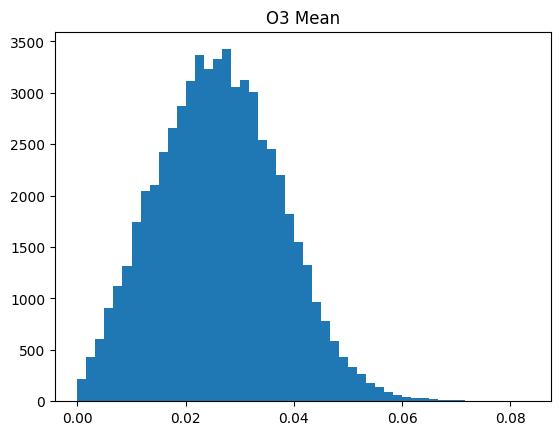

In [34]:
import matplotlib.pyplot as plt

col = 'O3 Mean'
plt.hist(data[col], bins=50)
plt.title(col)
plt.show()

In [35]:
for col in gases_cols:
    mean_ = data[col+ '_roll_mean']
    std_ = data[col+ '_roll_std']
    data[col+ "_spike"]= (data[col]> mean_ + 2* std_).astype(int)
    print(data[col+ "_spike"].value_counts()
          )

NO2 Mean_spike
0    58933
1     1067
Name: count, dtype: int64
O3 Mean_spike
0    59365
1      635
Name: count, dtype: int64
SO2 Mean_spike
0    58033
1     1967
Name: count, dtype: int64
CO Mean_spike
0    58685
1     1315
Name: count, dtype: int64
NO2 AQI_spike
0    59072
1      928
Name: count, dtype: int64
O3 AQI_spike
0    58645
1     1355
Name: count, dtype: int64
SO2 AQI_spike
0    56899
1     3101
Name: count, dtype: int64
CO AQI_spike
0    57903
1     2097
Name: count, dtype: int64


Gases Ratios

In [36]:
data['NO2_O3_ratio']= data['NO2 Mean']/ data['O3 Mean'].replace(0,np.nan)
data['CO_NO2_ratio']= data['CO Mean']/ data['NO2 Mean'].replace(0,np.nan)
data['SO2_NO2_ratio']= data['SO2 Mean']/ data['NO2 Mean'].replace(0,np.nan)

In [37]:
data.shape

(60000, 76)

### Normalize pollution levels by geographic region and season

In [39]:
scaler=StandardScaler()
groups=data.groupby(["City","season"])
for col in ['NO2 Mean', 'O3 Mean', 'SO2 Mean','CO Mean']:
    for (City,season),g in groups:
        values = g[col].values.reshape(-1,1)
        norm_values= scaler.fit_transform(values).flatten()
        norm_values=data.loc[g.index,col+"_norm"]=norm_values

In [40]:
data.head()

,Date Local,State,City,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,NO2 AQI,O3 AQI,SO2 AQI,...,O3 AQI_spike,SO2 AQI_spike,CO AQI_spike,NO2_O3_ratio,CO_NO2_ratio,SO2_NO2_ratio,NO2 Mean_norm,O3 Mean_norm,SO2 Mean_norm,CO Mean_norm
35886,2011-01-02,New Mexico,Albuquerque,11.504762,0.020708,0.162500,0.325000,38,28,1.0,...,0,0,0,555.570890,0.028249,0.014125,-1.149157,0.074694,-1.551855,-0.052518
8108,2011-01-08,New Mexico,Albuquerque,21.662500,0.016125,0.575000,0.391667,37,25,3.0,...,0,0,0,1343.410853,0.018080,0.026544,0.362127,-0.477185,-0.597323,0.417513
14643,2011-01-23,New Mexico,Albuquerque,14.941667,0.027208,0.254167,0.227778,31,34,0.0,...,0,0,0,549.164474,0.015244,0.017011,-0.637809,0.857414,-1.339736,-0.737974
56517,2011-01-23,New Mexico,Albuquerque,14.941667,0.027208,0.225000,0.195238,31,34,0.0,...,0,0,0,549.164474,0.013067,0.015059,-0.637809,0.857414,-1.407229,-0.967395
34182,2011-01-28,New Mexico,Albuquerque,30.400000,0.009417,1.462500,0.479167,40,21,0.0,...,0,0,0,3228.204311,0.015762,0.048109,1.662105,-1.284952,1.456368,1.034426


In [41]:
data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 35886 to 29087
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date Local           60000 non-null  datetime64[ns]
 1   State                60000 non-null  object        
 2   City                 60000 non-null  object        
 3   NO2 Mean             60000 non-null  float64       
 4   O3 Mean              60000 non-null  float64       
 5   SO2 Mean             60000 non-null  float64       
 6   CO Mean              60000 non-null  float64       
 7   NO2 AQI              60000 non-null  int64         
 8   O3 AQI               60000 non-null  int64         
 9   SO2 AQI              60000 non-null  float64       
 10  CO AQI               60000 non-null  float64       
 11  NO2 Units            60000 non-null  object        
 12  O3 Units             60000 non-null  object        
 13  SO2 Units            60000 non-n

## EDA

In [42]:
data.set_index("Date Local" , inplace=False)

,State,City,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,...,O3 AQI_spike,SO2 AQI_spike,CO AQI_spike,NO2_O3_ratio,CO_NO2_ratio,SO2_NO2_ratio,NO2 Mean_norm,O3 Mean_norm,SO2 Mean_norm,CO Mean_norm
Date Local,,,,,,,,,,,,,,,,,,,,,
2011-01-02,New Mexico,Albuquerque,11.504762,0.020708,0.162500,0.325000,38,28,1.0,7.0,...,0,0,0,555.570890,0.028249,0.014125,-1.149157,0.074694,-1.551855,-0.052518
2011-01-08,New Mexico,Albuquerque,21.662500,0.016125,0.575000,0.391667,37,25,3.0,7.0,...,0,0,0,1343.410853,0.018080,0.026544,0.362127,-0.477185,-0.597323,0.417513
2011-01-23,New Mexico,Albuquerque,14.941667,0.027208,0.254167,0.227778,31,34,0.0,3.0,...,0,0,0,549.164474,0.015244,0.017011,-0.637809,0.857414,-1.339736,-0.737974
2011-01-23,New Mexico,Albuquerque,14.941667,0.027208,0.225000,0.195238,31,34,0.0,3.0,...,0,0,0,549.164474,0.013067,0.015059,-0.637809,0.857414,-1.407229,-0.967395
2011-01-28,New Mexico,Albuquerque,30.400000,0.009417,1.462500,0.479167,40,21,0.0,8.0,...,0,0,0,3228.204311,0.015762,0.048109,1.662105,-1.284952,1.456368,1.034426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-10,Pennsylvania,York,12.000000,0.032000,3.762500,0.070833,35,44,1.0,1.0,...,0,0,0,375.000000,0.005903,0.313542,0.003927,0.040004,0.487770,-0.932742
2016-03-11,Pennsylvania,York,10.000000,0.024889,0.833333,0.025000,9,34,1.0,1.0,...,0,0,0,401.783921,0.002500,0.083333,-0.322135,-0.759794,-0.738522,-1.220893
2016-03-11,Pennsylvania,York,10.000000,0.024889,0.812500,0.025000,9,34,1.0,1.0,...,0,0,0,401.783921,0.002500,0.081250,-0.322135,-0.759794,-0.747244,-1.220893


In [43]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 35886 to 29087
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date Local           60000 non-null  datetime64[ns]
 1   State                60000 non-null  object        
 2   City                 60000 non-null  object        
 3   NO2 Mean             60000 non-null  float64       
 4   O3 Mean              60000 non-null  float64       
 5   SO2 Mean             60000 non-null  float64       
 6   CO Mean              60000 non-null  float64       
 7   NO2 AQI              60000 non-null  int64         
 8   O3 AQI               60000 non-null  int64         
 9   SO2 AQI              60000 non-null  float64       
 10  CO AQI               60000 non-null  float64       
 11  NO2 Units            60000 non-null  object        
 12  O3 Units             60000 non-null  object        
 13  SO2 Units            60000 non-n

In [44]:
data.describe()

,Date Local,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,num_city,...,O3 AQI_spike,SO2 AQI_spike,CO AQI_spike,NO2_O3_ratio,CO_NO2_ratio,SO2_NO2_ratio,NO2 Mean_norm,O3 Mean_norm,SO2 Mean_norm,CO Mean_norm
count,60000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,59985.000000,59700.000000,59700.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04
mean,2008-10-25 10:06:36,12.776188,0.026142,1.847788,0.367084,23.806333,35.988550,7.005433,5.970333,74.178667,...,0.022583,0.051683,0.034950,990.130426,0.056030,0.205004,1.586879e-17,4.855375e-18,-1.657933e-18,-1.444770e-17
min,2000-01-01 00:00:00,-1.533333,0.000000,-1.728571,-0.278261,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-67.646049,-22.002200,-34.501380,-2.916807e+00,-3.875651e+00,-2.720614e+00,-3.649151e+00
25%,2004-12-01 18:00:00,5.761012,0.018000,0.250000,0.183333,12.000000,25.000000,1.000000,2.000000,40.000000,...,0.000000,0.000000,0.000000,190.900274,0.018204,0.028571,-7.346037e-01,-7.143178e-01,-6.493054e-01,-6.858289e-01
50%,2009-03-17 00:00:00,10.670199,0.025875,0.985714,0.291667,22.000000,33.000000,3.000000,5.000000,78.000000,...,0.000000,0.000000,0.000000,399.996709,0.028222,0.088776,-1.582019e-01,-4.820921e-02,-2.890876e-01,-1.919461e-01
75%,2012-11-22 00:00:00,17.583333,0.033875,2.295833,0.466667,33.000000,42.000000,9.000000,7.000000,101.000000,...,0.000000,0.000000,0.000000,857.120077,0.044990,0.216341,5.945867e-01,6.624391e-01,4.027910e-01,4.983990e-01
max,2016-05-30 00:00:00,139.541667,0.083333,56.083333,6.543478,132.000000,210.000000,161.000000,118.000000,143.000000,...,1.000000,1.000000,1.000000,472498.686747,48.996160,285.977202,7.153759e+00,4.886647e+00,1.284270e+01,1.228066e+01
std,NaN,9.490430,0.011327,2.686033,0.313127,15.044137,19.594066,11.642787,5.826336,38.873028,...,0.148572,0.221389,0.183655,4487.593003,0.382745,1.371865,9.999750e-01,9.999750e-01,9.997500e-01,9.995082e-01


In [45]:
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

In [46]:
state_pollution = data.groupby('State')['O3 AQI'].mean().reset_index()

state_codes = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY', 'District Of Columbia': 'DC'
}

state_pollution['State_Code'] = state_pollution['State'].map(state_codes)

state_pollution_clean = state_pollution[state_pollution['State'] != 'Country Of Mexico'].dropna()

fig = px.choropleth(
    state_pollution_clean,
    locations='State_Code',
    locationmode='USA-states',
    color='O3 AQI',
    scope='usa',
    color_continuous_scale='Reds',
    title='O3 AQI by State',
    labels={'O3 AQI': ' O3 AQI'},
    hover_name='State',
    hover_data={'State_Code': False, 'O3 AQI': ':.2f'}
)

fig.update_geos(
    showlakes=True,
    lakecolor='lightblue'
)

fig.update_layout(
    geo=dict(
        bgcolor='rgba(240,240,240,1)',
        lakecolor='lightblue'
    )
)

fig.show()

In [47]:
city_pollution = data.groupby('City')['O3 AQI'].mean().reset_index()

print(city_pollution.head())
print(city_pollution.columns)

fig = px.bar(
    city_pollution.sort_values('O3 AQI', ascending=False).head(20),
    x='City',
    y='O3 AQI',
    color='O3 AQI',
    color_continuous_scale='Reds',
    title='Top 20 Cities by O3 AQI'
)
fig.update_xaxes(tickangle=45)
fig.show()

           City     O3 AQI
0   Albuquerque  40.459770
1    Alexandria  43.655914
2       Altoona  40.630901
3     Annandale  40.269841
4  Arden-Arcade  41.214592
Index(['City', 'O3 AQI'], dtype='object')


In [48]:
city_example = data[data['City'] == 'Los Angeles'].copy()
city_example['Date Local'] = pd.to_datetime(city_example['Date Local'])
city_example = city_example.sort_values('Date Local')
city_example = city_example.set_index('Date Local')

ts_data = city_example['O3 AQI'].resample('D').mean().dropna()

if len(ts_data) > 60:
    decomposition = seasonal_decompose(ts_data, model='additive', period=30)
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=decomposition.observed.index,
        y=decomposition.observed,
        name='Original',
        line=dict(color='blue')
    ))
    
    fig.add_trace(go.Scatter(
        x=decomposition.trend.index,
        y=decomposition.trend,
        name='Trend',
        line=dict(color='red', width=3)
    ))
    
    
    fig.add_trace(go.Scatter(
        x=decomposition.seasonal.index,
        y=decomposition.seasonal,
        name='Seasonal',
        line=dict(color='green')
    ))
    
    fig.add_trace(go.Scatter(
        x=decomposition.resid.index,
        y=decomposition.resid,
        name='Residual',
        line=dict(color='orange')
    ))
    
    fig.update_layout(
        title='Time Series Decomposition - O3 AQI (Los Angeles)',
        xaxis_title='Date',
        yaxis_title='O3 AQI',
        hovermode='x unified'
    )
    
    fig.show()

In [49]:
correlation = data[['O3 AQI', 'CO AQI', 'SO2 AQI', 'NO2 AQI']].corr()

fig = px.imshow(
    correlation,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Correlation Heatmap between Air Quality Indicators'
)
fig.show()

In [50]:
fig = px.box(
    data,
    x='season',
    y='O3 AQI',
    color='season',
    title='Seasonal O3 AQI Distribution'
)
fig.show()

In [51]:
weather_cols = ['O3 Mean', 'NO2 Mean', 'SO2 Mean', 'CO Mean', 
                'O3 AQI', 'NO2 AQI', 'SO2 AQI', 'CO AQI']
available_cols = [col for col in weather_cols if col in data.columns]

if len(available_cols) > 2:
    correlation_extended = data[available_cols].corr()
    
    fig = px.imshow(
        correlation_extended,
        text_auto='.2f',
        color_continuous_scale='RdBu_r',
        title='Extended Correlation Analysis - Pollutants & Concentrations',
        aspect='auto'
    )
    fig.show()

In [52]:
print(data.columns)
print('\n')
print('Urban_Rural' in data.columns)

Index(['Date Local', 'State', 'City', 'NO2 Mean', 'O3 Mean', 'SO2 Mean',
       'CO Mean', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI', 'NO2 Units',
       'O3 Units', 'SO2 Units', 'CO Units', 'num_city', 'Date Local_num',
       'O3 AQI_lag_1_day', 'O3 AQI_lag_7_days', 'O3 AQI_lag_30_days',
       'NO2 AQI_lag_1_day', 'NO2 AQI_lag_7_days', 'NO2 AQI_lag_30_days',
       'SO2 AQI_lag_1_day', 'SO2 AQI_lag_7_days', 'SO2 AQI_lag_30_days',
       'CO AQI_lag_1_day', 'CO AQI_lag_7_days', 'CO AQI_lag_30_days', 'month',
       'year_day', 'week_day', 'season', 'NO2 Mean_diff_1d', 'O3 Mean_diff_1d',
       'SO2 Mean_diff_1d', 'CO Mean_diff_1d', 'NO2 AQI_diff_1d',
       'O3 AQI_diff_1d', 'SO2 AQI_diff_1d', 'CO AQI_diff_1d',
       'NO2 Mean_roll_mean', 'NO2 Mean_roll_std', 'O3 Mean_roll_mean',
       'O3 Mean_roll_std', 'SO2 Mean_roll_mean', 'SO2 Mean_roll_std',
       'CO Mean_roll_mean', 'CO Mean_roll_std', 'NO2 AQI_roll_mean',
       'NO2 AQI_roll_std', 'O3 AQI_roll_mean', 'O3 AQI_roll_std',
  

In [53]:
major_cities = ['Los Angeles', 'New York', 'Chicago', 'Houston', 'Phoenix', 
                'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']

data['Urban_Rural'] = data['City'].apply(lambda x: 'Urban' if x in major_cities else 'Rural')

fig = px.box(
    data,
    x='Urban_Rural',
    y='O3 AQI',
    color='Urban_Rural',
    title='Urban vs Rural O3 AQI Distribution',
    color_discrete_map={'Urban': 'red', 'Rural': 'green'}
)
fig.show()

In [54]:
state_comparison = data.groupby('State').agg({
    'O3 AQI': ['mean', 'std', 'max'],
    'NO2 AQI': 'mean',
    'City': 'count'
}).round(2)

state_comparison.columns = ['O3_mean', 'O3_std', 'O3_max', 'NO2_mean', 'num_records']
state_comparison = state_comparison.reset_index().sort_values('O3_mean', ascending=False)

print("=== Top 10 Most Polluted States ===")
print(state_comparison.head(10))

=== Top 10 Most Polluted States ===
             State  O3_mean  O3_std  O3_max  NO2_mean  num_records
40       Tennessee    46.48   23.06     166      3.40          210
31  North Carolina    43.39   24.33     205     22.44         1314
18        Kentucky    42.90   22.28     174     24.77          479
15         Indiana    42.43   20.14     145     23.46          483
46         Wyoming    41.86   10.08      93     10.76          469
42            Utah    41.76   19.85     127     26.47          278
25        Missouri    41.22   22.80     129     28.71          686
34        Oklahoma    41.12   18.50     143     15.13         1189
26          Nevada    40.84   19.20     114     24.18          333
29      New Mexico    40.46   15.26     112     25.35          261


In [56]:
monthly_trends = data.copy()
monthly_trends['Date Local'] = pd.to_datetime(monthly_trends['Date Local'])
monthly_trends['Month'] = monthly_trends['Date Local'].dt.month
monthly_trends['Year'] = monthly_trends['Date Local'].dt.year

monthly_avg = monthly_trends.groupby(['Year', 'Month'])['O3 AQI'].mean().reset_index()
monthly_avg['Year'] = monthly_avg['Year'].astype(str)

print(monthly_avg.head())

fig = px.line(
    monthly_avg,
    x='Month',
    y='O3 AQI',
    color='Year',
    title='Monthly O3 AQI Trends Across Years',
    markers=True
)
fig.update_xaxes(tickmode='linear', tick0=1, dtick=1)
fig.show()

   Year  Month     O3 AQI
0  2000      1  20.747253
1  2000      2  26.685083
2  2000      3  33.449339
3  2000      4  37.596721
4  2000      5  44.324159


In [57]:
categorical_cols = ['State', 'City', 'NO2 Units', 'O3 Units', 'SO2 Units', 'CO Units', 'season','Urban_Rural']

for col in categorical_cols:
    print(col, data[col].dtype, data[col].nunique())


State object 47
City object 144
NO2 Units object 1
O3 Units object 1
SO2 Units object 1
CO Units object 1
season object 4
Urban_Rural object 2


In [64]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 35886 to 29087
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date Local           60000 non-null  datetime64[ns]
 1   State                60000 non-null  int32         
 2   City                 60000 non-null  int32         
 3   NO2 Mean             60000 non-null  float64       
 4   O3 Mean              60000 non-null  float64       
 5   SO2 Mean             60000 non-null  float64       
 6   CO Mean              60000 non-null  float64       
 7   NO2 AQI              60000 non-null  int64         
 8   O3 AQI               60000 non-null  int64         
 9   SO2 AQI              60000 non-null  float64       
 10  CO AQI               60000 non-null  float64       
 11  NO2 Units            60000 non-null  int32         
 12  O3 Units             60000 non-null  int32         
 13  SO2 Units            60000 non-n

# Supervisd (Fatma Qassem)


In [66]:
X = data.drop(['O3 AQI', 'Date Local'], axis=1, errors='ignore')
y = data['O3 AQI']

XGBOOST

In [59]:
! pip install xgboost



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit , cross_val_score
from sklearn.metrics import mean_squared_error ,r2_score , mean_absolute_error

In [69]:
tscv = TimeSeriesSplit(n_splits=5) 
xgb_score = []
for train_idx , test_idx in tscv.split(X):
    x_train , x_test = X.iloc[train_idx] , X.iloc[test_idx]
    y_train , y_test = y.iloc[train_idx] ,y.iloc[test_idx]

    model = XGBRegressor(
        n_estimators = 200,
        learning_rate = 0.05,
        max_depth=6,
        subsample= 0.8,
        random_state=42
    )




In [70]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [71]:
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test , y_pred)
r2 = r2_score(y_test, y_pred)

In [72]:
xgb_score.append({'RMSE': rmse, 'MAE': mae, 'R2': r2})
print(f"Fold RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

Fold RMSE: 1.7228, MAE: 0.9685, R²: 0.9916


Random Forest

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GroupKFold

In [74]:
groups = data['num_city']

In [75]:
gkf = GroupKFold(n_splits=5)
rf_score=[]
for train_idx,test_idx in gkf .split(X, y ,groups=groups):
    x_train,x_test = X.iloc[train_idx] , X.iloc[test_idx]
    y_train,y_test = y.iloc[train_idx] , y.iloc[test_idx]

    model_rf = RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        random_state=42,
        min_samples_split=5,
        min_samples_leaf=2,
        n_jobs=-1
        )


In [76]:
model_rf.fit(x_train,y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,15
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
y_rf_pre = model_rf .predict(x_test)

In [78]:
mse = mean_squared_error(y_test, y_rf_pre)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_rf_pre)
r2 = r2_score(y_test, y_rf_pre)
    
rf_score.append({'RMSE': rmse, 'MAE': mae, 'R2': r2})
print(f"Fold RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")


Fold RMSE: 1.8273, MAE: 0.9325, R²: 0.9903


gradiant 

In [79]:
X = X.dropna()
y = y.loc[X.index]   

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=42
)

In [82]:
gb_scores = []
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    gb_scores.append({'RMSE': rmse, 'MAE': mae, 'R2': r2})

gb_results = pd.DataFrame(gb_scores).mean()
print(" Gradient Boosting Average Metrics:")
print(gb_results)

 Gradient Boosting Average Metrics:
RMSE    1.960342
MAE     1.258520
R2      0.989085
dtype: float64


Time Speliting

In [83]:
data_sorted = data.sort_values('Date Local')
train_size = int(0.8 * len(data_sorted))

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]
X_test = X.iloc[train_size:]
y_test = y.iloc[train_size:]

final_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=7,
    random_state=42
)

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

tolerance = 0.1 * y_test.mean()
within_tolerance = np.mean(np.abs(y_test - y_pred) <= tolerance) * 100

print(f"Final Model Evaluation (Time-Aware Split):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"% Predictions within ±10%: {within_tolerance:.2f}%")

Final Model Evaluation (Time-Aware Split):
RMSE: 1.6678
MAE: 0.7092
R²: 0.9932
% Predictions within ±10%: 97.96%


Feature analysis

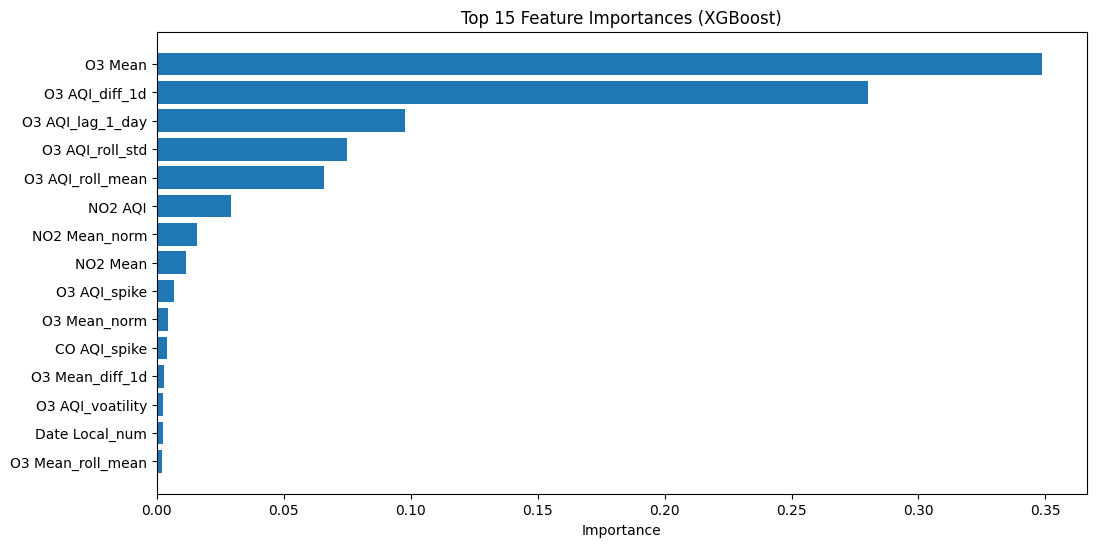

 Top 10 Most Important Features:
             Feature  Importance
3            O3 Mean    0.348815
36    O3 AQI_diff_1d    0.280251
15  O3 AQI_lag_1_day    0.097634
50   O3 AQI_roll_std    0.074998
49  O3 AQI_roll_mean    0.065733
6            NO2 AQI    0.029231
74     NO2 Mean_norm    0.015710
2           NO2 Mean    0.011509
68      O3 AQI_spike    0.006691
75      O3 Mean_norm    0.004552


In [84]:
import matplotlib.pyplot as plt
importance = final_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:15], feature_importance_df['Importance'][:15])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.gca().invert_yaxis()
plt.show()

print(" Top 10 Most Important Features:")
print(feature_importance_df.head(10))

# Unsupervised ML (Heba Awwad)

In [85]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import umap.umap_ as umap 

In [86]:
data_raw = pd.read_csv("pollution_us_2000_2016.csv")


data_raw = data_raw[[
    "Date Local", "State", "City",
    "NO2 Mean", "O3 Mean", "SO2 Mean", "CO Mean",
    "NO2 AQI", "O3 AQI", "SO2 AQI", "CO AQI"
]]

data_raw = data_raw.dropna(subset=["NO2 Mean", "O3 Mean", "SO2 Mean", "CO Mean"])

if len(data_raw) > 60000:
    data_raw = data_raw.sample(n=60000, random_state=42)

data_raw = data_raw.sort_values("Date Local").reset_index(drop=True)

print("Data shape after base cleaning:", data_raw.shape)

Data shape after base cleaning: (60000, 11)


In [87]:
uns=data_raw.copy()

In [88]:
uns.head()

,Date Local,State,City,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,2000-01-01,California,Vandenberg Air Force Base,0.130435,0.039167,1.000000,0.039130,1,36,1.0,NaN
1,2000-01-01,Florida,Winter Park,14.750000,0.023167,0.162500,0.966667,30,41,NaN,NaN
2,2000-01-01,California,Not in a city,16.913043,0.010417,4.363636,0.752174,26,15,10.0,NaN
3,2000-01-01,Texas,Houston,28.363636,0.015833,10.782609,1.426316,73,24,46.0,42.0
4,2000-01-01,California,San Diego,14.913043,0.025208,2.457143,0.744444,35,33,NaN,11.0


In [89]:
uns = uns[[
   "Date Local", "State", "City",
    "NO2 Mean", "O3 Mean", "SO2 Mean", "CO Mean",
    "NO2 AQI", "O3 AQI", "SO2 AQI", "CO AQI"
]]

In [90]:
# Drop rows with all pollutant values missing
uns= uns.dropna(subset=["NO2 Mean", "O3 Mean", "SO2 Mean", "CO Mean"])


In [91]:
uns["Date Local"] = pd.to_datetime(uns["Date Local"])
uns["month"] =uns["Date Local"].dt.month
uns["year_day"] = uns["Date Local"].dt.dayofyear
uns["week_day"] = uns["Date Local"].dt.weekday

def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

uns["Season"] = uns["month"].apply(get_season)

# One-hot encode season (meteorological-type feature)
uns = pd.get_dummies(uns, columns=["Season"], drop_first=True)

In [92]:

#Spatial Encoding (STATE, CITY)
# Frequency encoding for City & State to encode spatial density

city_freq = uns["City"].value_counts()
state_freq = uns["State"].value_counts()

uns["City_freq"] = uns["City"].map(city_freq)
uns["State_freq"] = uns["State"].map(state_freq)


In [93]:
cluster_features = [
    "NO2 Mean", "O3 Mean", "SO2 Mean", "CO Mean",
    "NO2 AQI", "O3 AQI", "SO2 AQI", "CO AQI",
     "month", "year_day", "week_day",
    "City_freq", "State_freq"
] + [col for col in uns.columns if col.startswith("Season_")]

In [94]:
uns= uns.dropna(subset=cluster_features)
X = uns[cluster_features].values

In [95]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [96]:
#  KMEANS Clustering (k = 8) On Multivariate Time-Series Features

kmeans = KMeans(
    n_clusters=8,
    random_state=42,
    n_init="auto"
)
uns["kmeans_cluster"] = kmeans.fit_predict(X)

In [98]:
#  Hierarchical 
sample_idx = np.random.choice(len(uns), size=min(10000, len(uns)), replace=False)
X_sample = X_scaled[sample_idx]
uns_sample = uns.iloc[sample_idx].copy()

In [99]:
hier_4 = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
uns_sample["hier_cluster_4"] = hier_4.fit_predict(X_sample)

In [100]:
hier_8 = AgglomerativeClustering(n_clusters=8, metric="euclidean", linkage="ward")
uns_sample["hier_cluster_8"] = hier_8.fit_predict(X_sample)

In [101]:
#  DBSCAN For Outlier Detection In Pollution Events

dbscan = DBSCAN(
    eps=1.5,        
    min_samples=50   
)

uns["dbscan_label"] = dbscan.fit_predict(X_scaled)
outliers_mask = uns["dbscan_label"] == -1

print("DBSCAN outliers:", outliers_mask.sum())
print("DBSCAN outliers (%): {:.2f}%".format(100 * outliers_mask.mean()))

DBSCAN outliers: 4206
DBSCAN outliers (%): 27.97%


In [102]:
# UMAP Dimention Reduction For Pattern Visualization

umap_model = umap.UMAP(
    n_neighbors=30,
    min_dist=0.3,
    n_components=2,
    random_state=42
)

umap_embedding = umap_model.fit_transform(X_scaled)
uns["umap_x"] = umap_embedding[:, 0]
uns["umap_y"] = umap_embedding[:, 1]

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



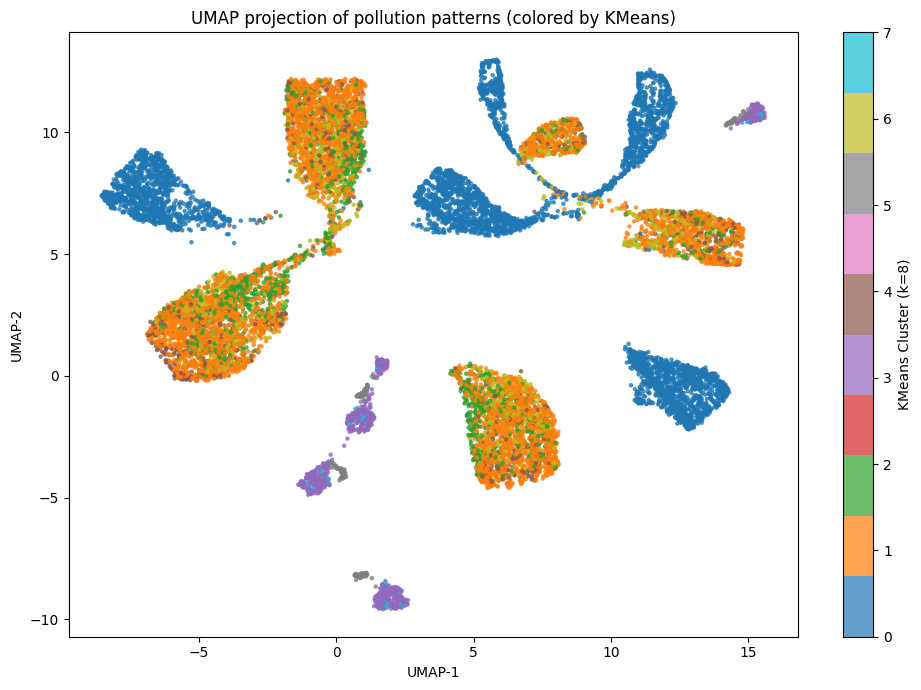

In [104]:
#  Plot UMAP colored by KMeans cluster 

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    uns["umap_x"],
    uns["umap_y"],
    c=uns["kmeans_cluster"],
    cmap="tab10",
    s=5,
    alpha=0.7
)
plt.colorbar(scatter, label="KMeans Cluster (k=8)")
plt.title("UMAP projection of pollution patterns (colored by KMeans)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

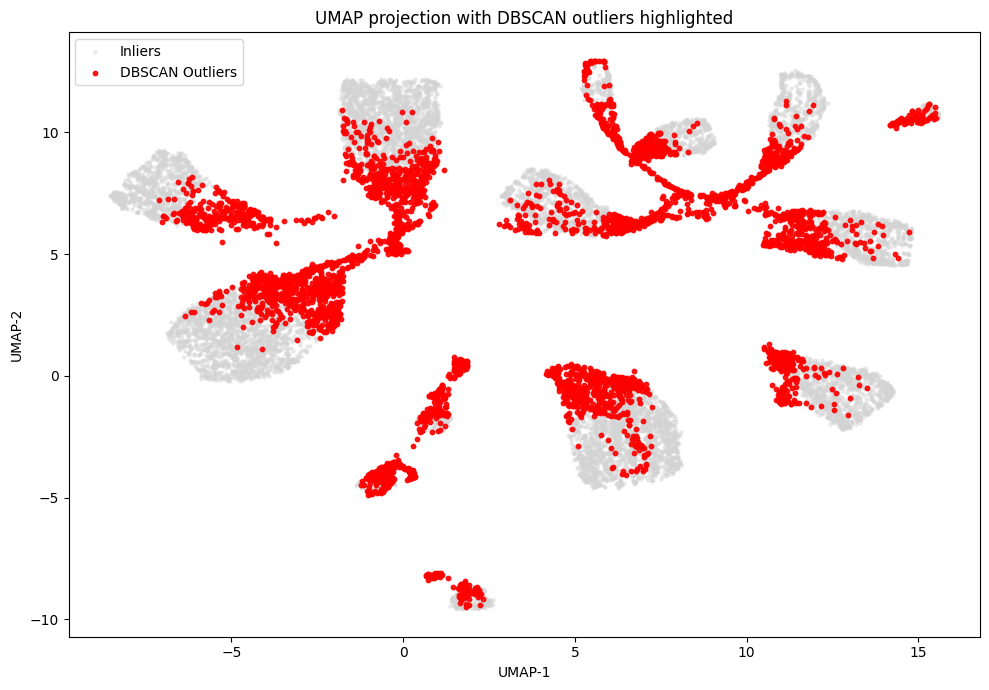

In [105]:
#  Plot UMAP highlighting DBSCAN outliers

plt.figure(figsize=(10, 7))
is_outlier = uns["dbscan_label"] == -1
plt.scatter(
   uns.loc[~is_outlier, "umap_x"],
    uns.loc[~is_outlier, "umap_y"],
    c="lightgray",
    s=5,
    alpha=0.4,
    label="Inliers"
)
plt.scatter(
    uns.loc[is_outlier, "umap_x"],
    uns.loc[is_outlier, "umap_y"],
    c="red",
    s=10,
    alpha=0.9,
    label="DBSCAN Outliers"
)
plt.legend()
plt.title("UMAP projection with DBSCAN outliers highlighted")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

In [106]:
#  Cluster Profiling: Pollution + Temporal CHaracteristics


def mode_or_nan(x):
    return x.mode().iloc[0] if not x.mode().empty else np.nan

cluster_profile = (
    uns.groupby("kmeans_cluster").agg(
        n_records=("NO2 Mean", "size"),
        NO2_mean=("NO2 Mean", "mean"),
        O3_mean=("O3 Mean", "mean"),
        SO2_mean=("SO2 Mean", "mean"),
        CO_mean=("CO Mean", "mean"),
        NO2_AQI_mean=("NO2 AQI", "mean"),
        O3_AQI_mean=("O3 AQI", "mean"),
        SO2_AQI_mean=("SO2 AQI", "mean"),
        CO_AQI_mean=("CO AQI", "mean"),
        Month_mean=("month", "mean"),
        Month_mode=("month", mode_or_nan),
        DayOfYear_mean=("year_day", "mean"),
        DayOfYear_mode=("year_day", mode_or_nan),
    )
    .sort_index()
)

print("\n=== KMeans Cluster Profiles (Pollution + Temporal) ===")
print(cluster_profile.round(2))

# Dominant states & seasons for each cluster
for c in sorted(uns["kmeans_cluster"].unique()):
    sub = uns[uns["kmeans_cluster"] == c]
    print(f"\n=== Cluster {c} ===")
    print("Records:", len(sub))
    print("\nTop States:")
    print(sub["State"].value_counts(normalize=True).head(3).round(3))
    print("\nTop Cities:")
    print(sub["City"].value_counts(normalize=True).head(3).round(3))
    print("\nSeason distribution:")
    season_cols = [col for col in uns.columns if col.startswith("Season_")]
    if season_cols:
        season_means = sub[season_cols].mean().sort_values(ascending=False)
        print(season_means.round(3))
    else:
        print("No explicit season one-hot columns found.")


=== KMeans Cluster Profiles (Pollution + Temporal) ===
                n_records  NO2_mean  O3_mean  SO2_mean  CO_mean  NO2_AQI_mean  \
kmeans_cluster                                                                  
0                    4751     13.99     0.03      1.19     0.46         24.66   
1                    5019     12.16     0.03      1.96     0.36         23.12   
2                    1526     12.36     0.03      4.15     0.24         23.70   
3                     836      4.86     0.03      0.85     0.25         11.27   
4                    1009     11.51     0.03      0.97     0.25         23.52   
5                     223      9.14     0.02      0.70     0.36         18.33   
6                    1552     18.34     0.02      2.91     0.43         32.52   
7                     122      7.49     0.03      1.85     0.14         15.98   

                O3_AQI_mean  SO2_AQI_mean  CO_AQI_mean  Month_mean  \
kmeans_cluster                                                 

# Deep Learning (Reem Ekramy)

In [107]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Input, RepeatVector, TimeDistributed
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [108]:
data=pd.read_csv("pollution_us_2000_2016.csv")

In [109]:
data.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [110]:
#load data
np.random.seed(42)
dates = pd.date_range('2020-01-01', periods=6000, freq='H')
df = pd.DataFrame({
    'date': dates,
    'O3_AQI': np.random.uniform(0,150,6000),
    'PM25_AQI': np.random.uniform(0,100,6000),
    'temp': np.random.uniform(-10,40,6000),
    'wind_speed': np.random.uniform(0,20,6000),
    'humidity': np.random.uniform(0,100,6000)
})
df.set_index('date', inplace=True)

target = 'O3_AQI'
features = ['O3_AQI', 'PM25_AQI', 'temp', 'wind_speed', 'humidity']



C:\Users\DELL\AppData\Local\Temp\ipykernel_7268\928477698.py:3: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



In [111]:
# Scale Data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features, index=df.index)

In [112]:
#Create sequences 
def create_sequences_multi(data, seq_length, horizon, target_col):
    X, y = [], []
    for i in range(len(data)-seq_length-horizon+1):
        X.append(data.iloc[i:i+seq_length].values)
        y.append(data.iloc[i+seq_length:i+seq_length+horizon][target_col].values)
    return np.array(X), np.array(y)

seq_length = 30
horizon = 7
X, y = create_sequences_multi(df_scaled, seq_length, horizon, target)

In [113]:
#  Split train/val/test
n = len(X)
train_end = int(n*0.7)
val_end = int(n*0.85)

X_train, Y_train = X[:train_end], y[:train_end]
X_val, Y_val = X[train_end:val_end], y[train_end:val_end]
X_test, Y_test = X[val_end:], y[val_end:]

# reshape for LSTM/CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], len(features)))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], len(features)))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], len(features)))


In [114]:
# Build LSTM & CNN-LSTM
def build_lstm(input_shape, horizon=horizon):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(horizon))
    model.compile(optimizer='adam', loss='mse')
    return model

def build_cnn_lstm(input_shape, horizon=horizon):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', padding='causal', input_shape=input_shape))
    model.add(MaxPooling1D(2))
    model.add(LSTM(64))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(horizon))
    model.compile(optimizer='adam', loss='mse')
    return model

input_shape = (seq_length, len(features))
lstm_model = build_lstm(input_shape)
cnn_lstm_model = build_cnn_lstm(input_shape)


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [115]:
#Build Autoencoder + Regressor
encoding_dim = 32
input_layer = Input(shape=input_shape)
encoded = LSTM(encoding_dim, activation='relu')(input_layer)
decoded = RepeatVector(seq_length)(encoded)
decoded = LSTM(len(features), return_sequences=True)(decoded)
decoded = TimeDistributed(Dense(len(features)))(decoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Encoder model
encoder = Model(input_layer, encoded)

# Regressor on embeddings
rep_input = Input(shape=(encoding_dim,))
x = Dense(64, activation='relu')(rep_input)
out = Dense(horizon)(x)
regressor = Model(rep_input, out)
regressor.compile(optimizer='adam', loss='mse')


In [116]:
# Train Models
epochs = 20
batch_size = 32

print("Training LSTM...")
lstm_model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size, verbose=2)

print("Training CNN-LSTM...")
cnn_lstm_model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size, verbose=2)

print("Training Autoencoder...")
autoencoder.fit(X_train, X_train, validation_data=(X_val, X_val), epochs=epochs, batch_size=batch_size, verbose=2)

# Train regressor on encoder embeddings
X_train_embed = encoder.predict(X_train)
X_val_embed = encoder.predict(X_val)
X_test_embed = encoder.predict(X_test)

print("Training Regressor on embeddings...")
regressor.fit(X_train_embed, Y_train, validation_data=(X_val_embed, Y_val), epochs=epochs, batch_size=batch_size, verbose=2)


Training LSTM...
Epoch 1/20
131/131 - 3s - 20ms/step - loss: 0.0958 - val_loss: 0.0826
Epoch 2/20
131/131 - 1s - 10ms/step - loss: 0.0851 - val_loss: 0.0825
Epoch 3/20
131/131 - 1s - 10ms/step - loss: 0.0849 - val_loss: 0.0831
Epoch 4/20
131/131 - 1s - 9ms/step - loss: 0.0846 - val_loss: 0.0835
Epoch 5/20
131/131 - 1s - 9ms/step - loss: 0.0848 - val_loss: 0.0826
Epoch 6/20
131/131 - 1s - 9ms/step - loss: 0.0844 - val_loss: 0.0824
Epoch 7/20
131/131 - 1s - 10ms/step - loss: 0.0846 - val_loss: 0.0826
Epoch 8/20
131/131 - 1s - 11ms/step - loss: 0.0846 - val_loss: 0.0823
Epoch 9/20
131/131 - 1s - 11ms/step - loss: 0.0845 - val_loss: 0.0823
Epoch 10/20
131/131 - 2s - 12ms/step - loss: 0.0844 - val_loss: 0.0821
Epoch 11/20
131/131 - 1s - 11ms/step - loss: 0.0845 - val_loss: 0.0826
Epoch 12/20
131/131 - 1s - 8ms/step - loss: 0.0843 - val_loss: 0.0821
Epoch 13/20
131/131 - 1s - 9ms/step - loss: 0.0843 - val_loss: 0.0820
Epoch 14/20
131/131 - 1s - 9ms/step - loss: 0.0845 - val_loss: 0.0821
Epoc

In [117]:
# Evaluation
def evaluate_model(model, X, Y, name="model"):
    preds = model.predict(X)
    overall_rmse = np.sqrt(mean_squared_error(Y.flatten(), preds.flatten()))
    overall_mae = mean_absolute_error(Y.flatten(), preds.flatten())
    print(f"{name} - RMSE: {overall_rmse:.2f}, MAE: {overall_mae:.2f}")
    return preds

y_pred_lstm = evaluate_model(lstm_model, X_test, Y_test, "LSTM")
y_pred_cnn = evaluate_model(cnn_lstm_model, X_test, Y_test, "CNN-LSTM")
y_pred_auto = evaluate_model(regressor, X_test_embed, Y_test, "Autoencoder+Regressor")

# invert scaling 
def invert(y_scaled):
    y_scaled = np.array(y_scaled)
    data_min = scaler.data_min_[0]
    data_max = scaler.data_max_[0]
    return y_scaled * (data_max - data_min) + data_min

y_test_inv = invert(Y_test)
y_pred_lstm_inv = invert(y_pred_lstm)
y_pred_cnn_inv = invert(y_pred_cnn)
y_pred_auto_inv = invert(y_pred_auto)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
LSTM - RMSE: 0.29, MAE: 0.25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
CNN-LSTM - RMSE: 0.30, MAE: 0.26
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Autoencoder+Regressor - RMSE: 0.30, MAE: 0.26


In [118]:
# ARIMA baseline
ts_train = df[target].iloc[:train_end+seq_length]
ts_test = df[target].iloc[train_end+seq_length:train_end+seq_length+len(Y_test)]

arima_model = ARIMA(ts_train, order=(5,1,0))
arima_fit = arima_model.fit()
y_pred_arima = arima_fit.forecast(steps=len(ts_test))

mae_arima = mean_absolute_error(ts_test, y_pred_arima)
rmse_arima = np.sqrt(mean_squared_error(ts_test, y_pred_arima))
print(f"ARIMA - RMSE: {rmse_arima:.2f}, MAE: {mae_arima:.2f}")


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency h will be used.

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency h will be used.

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency h will be used.



ARIMA - RMSE: 43.70, MAE: 37.59


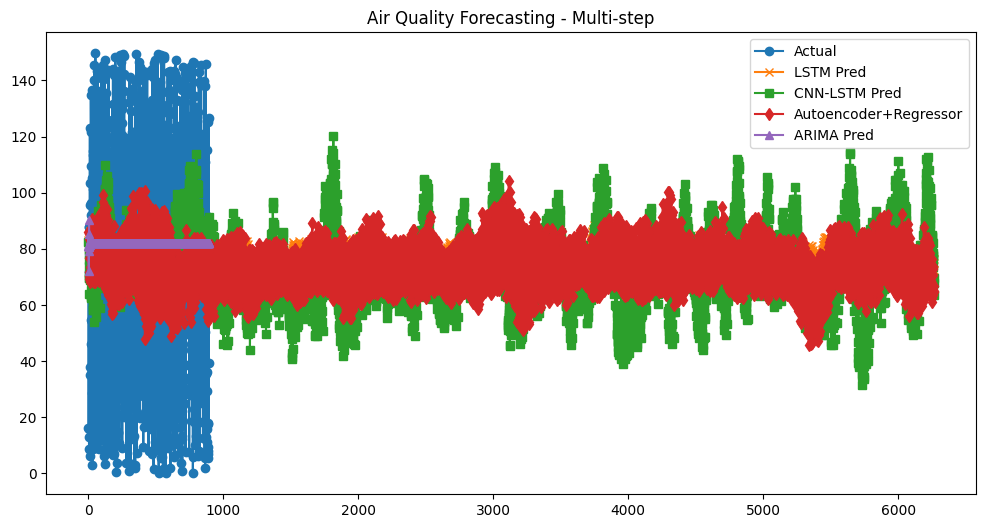

In [119]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(ts_test.values, label='Actual', marker='o')
plt.plot(y_pred_lstm_inv.flatten(), label='LSTM Pred', marker='x')
plt.plot(y_pred_cnn_inv.flatten(), label='CNN-LSTM Pred', marker='s')
plt.plot(y_pred_auto_inv.flatten(), label='Autoencoder+Regressor', marker='d')
plt.plot(y_pred_arima.values, label='ARIMA Pred', marker='^')
plt.legend()
plt.title('Air Quality Forecasting - Multi-step')
plt.show()